In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
sales_data=pd.read_csv('D:\\Learning\\Python Foundation Case Study 4 - Python Visualization Case Study\\Case Study 4 - Python Visualizations Case Study\\SalesData.csv')

### Q1.

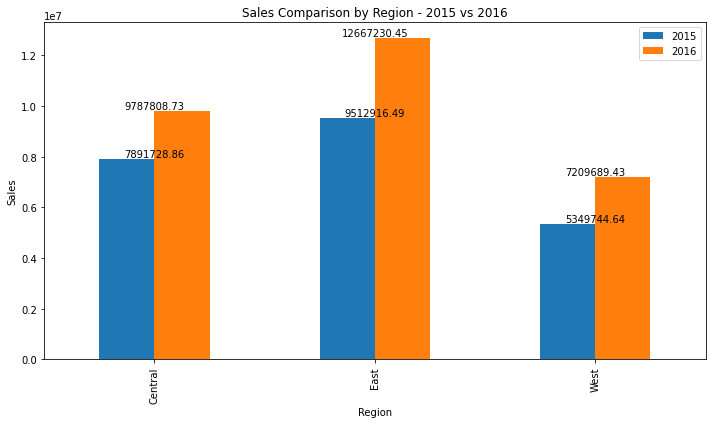

In [6]:
sales_by_region = sales_data[['Region', 'Sales2015', 'Sales2016']]

# Group the data by region and calculate total sales for each year
sales_by_region = sales_by_region.groupby('Region').sum()

# Plot the data as a bar chart
ax = sales_by_region.plot(kind='bar', figsize=(10, 6))
plt.title('Sales Comparison by Region - 2015 vs 2016')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend(['2015', '2016'])

# Add annotations to the chart
for i, (index, row) in enumerate(sales_by_region.iterrows()):
    ax.text(i, row['Sales2015'], f"{row['Sales2015']:.2f}", ha='center', va='bottom')
    ax.text(i, row['Sales2016'], f"{row['Sales2016']:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()





### Q2.

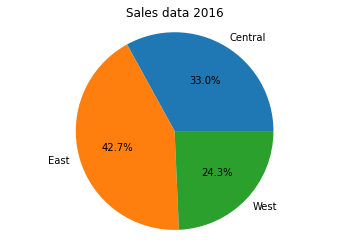

In [7]:
plt.pie(sales_by_region.Sales2016,labels=sales_by_region.index,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sales data 2016')
plt.show()

### Q3.

In [16]:
a = pd.pivot_table(sales_data, values=['Sales2015', 'Sales2016'], index=['Region','Tier'], aggfunc=sum)
a

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

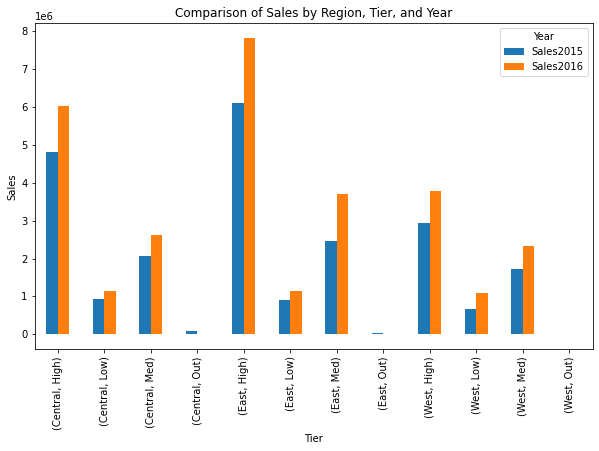

In [17]:

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
a.plot(kind='bar', ax=ax)

# Customize the chart
ax.set_xlabel('Tier')
ax.set_ylabel('Sales')
ax.set_title('Comparison of Sales by Region, Tier, and Year')
ax.legend(title='Year')

# Show the chart
plt.show()

### Q4

In [32]:
sales_east=sales_data[sales_data.Region=='East']
sales_east=sales_east.groupby('State')[['Sales2015','Sales2016']].sum()

 NY registered decline in 2016 compared to 2015 


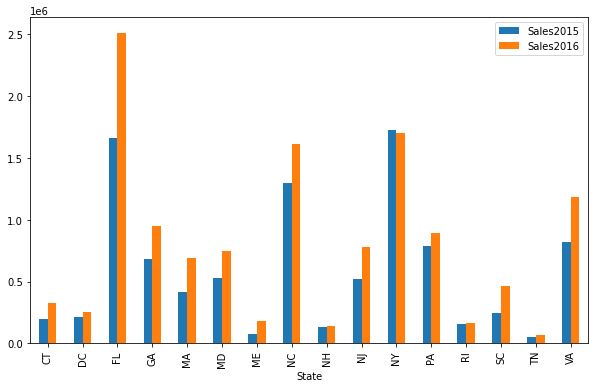

In [41]:
sales_east.plot(kind='bar', figsize= (10,6))
print("\033[1m NY registered decline in 2016 compared to 2015 \033[0m")

### Q5.

In [36]:
sales_high=sales_data[sales_data.Tier=='High']

In [38]:
sales_high=sales_high.groupby('Division')[['Units2015','Units2016']].sum()

<Axes: xlabel='Division'>

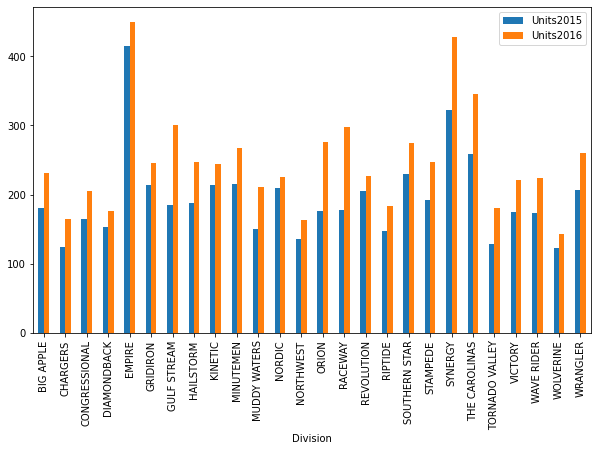

In [42]:
sales_high.plot(kind='bar', figsize=(10,6))

### Q6.

In [48]:
def get_quarter(month):
    if month in ['Jan', 'Feb', 'Mar']:
        return 'Q1'
    elif month in ['Apr', 'May', 'Jun']:
        return 'Q2'
    elif month in ['Jul', 'Aug', 'Sep']:
        return 'Q3'
    elif month in ['Oct', 'Nov', 'Dec']:
        return 'Q4'
    else:
        return 'Unknown'
    
sales_data['Quarter']=sales_data['Month'].apply(get_quarter)

### Q7.

In [49]:
sales_quarter=sales_data.groupby('Quarter')[['Sales2015','Sales2016']].sum()

<Axes: xlabel='Quarter'>

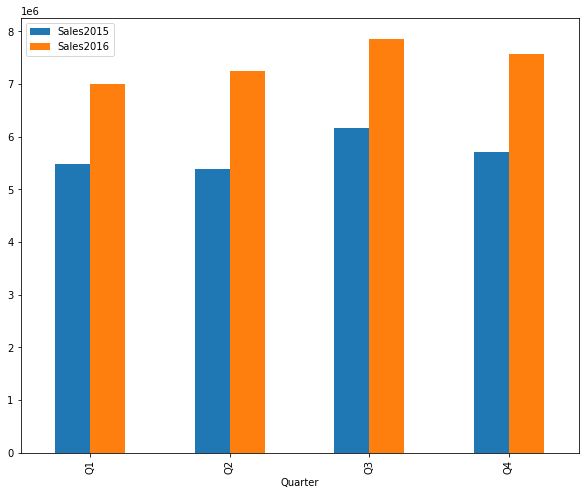

In [51]:
sales_quarter.plot(kind='bar', figsize=(10,8))

### Q8.

In [56]:
tier_quarter=sales_data.pivot_table(index='Quarter',columns='Tier',values='Sales2016')

In [57]:
tier_quarter

Tier,High,Low,Med,Out
Quarter,,,,
Q1,7974.677515,5516.469593,7654.041681,0.000000
Q2,8752.018136,5031.608757,8758.157542,0.000000
Q3,9334.404693,5446.422671,8197.976091,-360.947778
Q4,9386.142545,5052.104694,8307.596804,0.000000


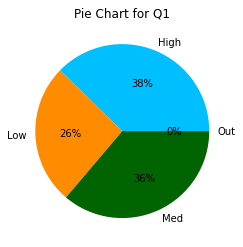

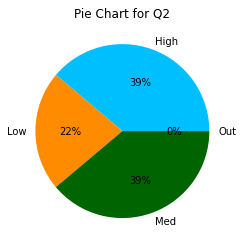

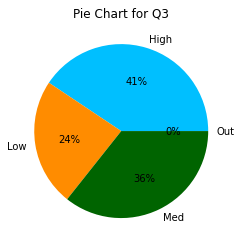

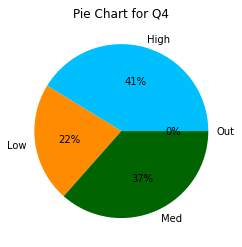

""


In [73]:
def plot_pie(tier_quarter,quarter):
    x_values = tier_quarter.loc[quarter, :].clip(0)

    plt.pie(x=x_values, autopct="%1.0f%%", labels=tier_quarter.columns, colors=['deepskyblue', 'darkorange', 'darkgreen', 'white'])
    plt.title(f"Pie Chart for {quarter}")
    plt.show()
tier_quarter.groupby(level=0).apply(lambda x: plot_pie(x, x.name))